# Exercício 02 - PEL201

## Exercício
Implemente os algoritmos QUICKSORT e BUBBLESORT. Implemente duas versões do QUICKSORT, o que pega um valor aleatório do vetor e outro que pega somente o primeiro elemento. Faça uma comparação de desempenho dos 3 algoritmos.

In [1]:
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from numpy import random

### Explique, em palavras, como é a solução do Bubble Sort e apresente o código do algoritmo implementado (identificando a linguagem usada)
Linguagem: `Python`

O algoritmo Bubblesort consiste em percorrer todos os itens da lista e compará-los com o item imediatamente posterior. Caso o item posterior seja menor, realiza a troca de posições. Este processo é repetido até que não hajam mais trocas.

In [2]:
def bubblesort(input_list):
    n = len(input_list)
    
    while True:
        swapped = False
        
        for i in range(n - 1):
            if input_list[i] > input_list[i+1]:
                input_list[i], input_list[i+1] = input_list[i+1], input_list[i] #swap
                swapped = True
        
        if swapped == False:
            break
        
    return input_list

In [3]:
test = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000]

In [4]:
bs_execucao = []

for i in tqdm(test):
    arr = random.randint(max(test), size=(i))
    arr = list(arr)
    bubble_start = time.time()
    arr_sorted = bubblesort(arr)
    bubble_end = time.time()
    bs_execucao.append(bubble_end - bubble_start)

100%|██████████| 20/20 [01:38<00:00,  4.94s/it]


### Explique, em palavras, como é a solução do QUICKSORT (em suas duas versões) e apresente o código do algoritmo implementado (identificando a linguagem usada)
Linguagem: `Python`

O algoritmo Quicksort consistem em três passos:

1. Escolher um item da lista como pivô. Existem diversas estratégias para fazer esta escolha (ex.: primeiro item, último item, aleatório, etc);

2. Após a escolha do pivô é realizada a fase de particionamento. Nesta fase todos os itens menores que o pivô são posicionados antes e os maior são posicionados depois.

3. Por último, execute de forma recursiva duas chamadas ao quicksort, uma para os itens menores que o pivô e outra para os itens maiores.

In [5]:
def quicksort(input_list, start, end, mode):
    if start < end:
        p = partition(input_list, start, end, mode)
        quicksort(input_list, start, p - 1, mode)
        quicksort(input_list, p + 1, end, mode)
        
def partition(part_list, part_start, part_end, mode):
    if mode == "start":
        pivot = part_list[part_start]
    else:
        pivot_index = random.randint(part_start,part_end)
        pivot = part_list[pivot_index]
        part_list[pivot_index], part_list[part_start] = part_list[part_start], part_list[pivot_index]
    
    i = part_start + 1
    
    for j in range(part_start + 1,part_end + 1):
        if part_list[j] < pivot:
            part_list[i], part_list[j] = part_list[j], part_list[i]
            i += 1
    part_list[part_start], part_list[i-1] = part_list[i-1], part_list[part_start]
    
    return i-1

In [6]:
qs_first_execucao = []

for i in tqdm(test):
    arr = random.randint(max(test), size=(i))
    arr = list(arr)
    qs_first_start = time.time()
    arr_sorted = quicksort(arr, 0, len(arr) - 1, "start")
    qs_first_end = time.time()
    qs_first_execucao.append(qs_first_end - qs_first_start)

100%|██████████| 20/20 [00:00<00:00, 41.76it/s] 


In [7]:
qs_random_execucao = []

for i in tqdm(test):
    arr = random.randint(max(test), size=(i))
    arr = list(arr)
    qs_random_start = time.time()
    arr_sorted = quicksort(arr, 0, len(arr) - 1, "random")
    qs_random_end = time.time()
    qs_random_execucao.append(qs_random_end - qs_random_start)

100%|██████████| 20/20 [00:01<00:00, 17.68it/s]


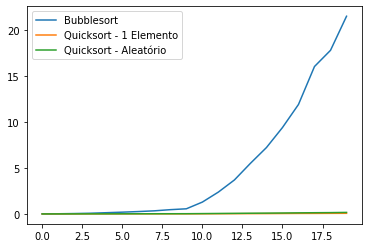

In [8]:
fig, ax = plt.subplots()

line1, = ax.plot(bs_execucao, label='Bubblesort')

line2, = ax.plot(qs_first_execucao, label='Quicksort - 1 Elemento')

line3, = ax.plot(qs_random_execucao, label='Quicksort - Aleatório')

ax.legend()
plt.show()

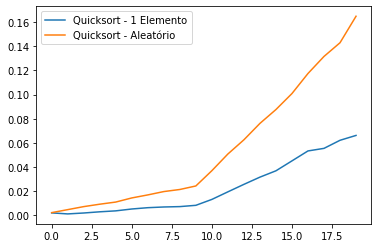

In [9]:
fig, ax = plt.subplots()

line1, = ax.plot(qs_first_execucao, label='Quicksort - 1 Elemento')

line2, = ax.plot(qs_random_execucao, label='Quicksort - Aleatório')

ax.legend()
plt.show()

### Análise dos Resultados

Comparando os resultados entre os três algoritmos podemos perceber que o Bubblesort apresenta uma curva muito semelhante a uma função exponencial enquanto o Quicksort apresenta um comportamento mais constante (ambas as versões: utilizando o primeiro elemento como pivô ou utilizando um ponto aleatório como pivô).

Porém, ao comparar somente as duas formas de se executar o Quicksort podemos perceber que ao utilizar o primeiro elemento como pivô temos um resultado mais eficiente em relação ao tempo de execução.